In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key='a6896f1da018412f8f7cce56bac83d8d'
# api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [5]:
print(api_key)

a6896f1da018412f8f7cce56bac83d8d


In [6]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [7]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in bitcoin_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
bitcoin = pd.DataFrame(sentiments)
bitcoin.head()

,text,Compound,Positive,Negative,Neutral
0,Just hackers burning up 0day like it’s a fire ...,0.0258,0.061,0.059,0.880
1,"Authorities in Tampa, Florida have arrested a ...",-0.4767,0.000,0.094,0.906
2,"On July 15, a Discord user with the handle Kir...",-0.4019,0.000,0.074,0.926
3,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000
4,Reuters had previously reported the FBI would ...,0.0772,0.038,0.000,0.962


In [9]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in ethereum_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
ethereum = pd.DataFrame(sentiments)
ethereum.head()

,text,Compound,Positive,Negative,Neutral
0,According to a public letter from the U.S. Com...,0.5719,0.132,0.000,0.868
1,"August\r\n4, 2020\r\n5 min read\r\nOpinions ex...",0.5423,0.123,0.000,0.877
2,Enlarge/ A screenshot from Wozniak's lawsuit s...,-0.6808,0.000,0.177,0.823
3,Crypto has been on a tear in the last week.\r\...,0.0000,0.000,0.000,1.000
4,"<ul><li>Bitcoin crossed the $11,000 level and ...",-0.4215,0.000,0.083,0.917


In [10]:
# Describe the Bitcoin Sentiment
bitcoin.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.144300,0.047900,0.075300,0.876800
std,0.472776,0.047401,0.086018,0.081783
min,-0.880400,0.000000,0.000000,0.687000
25%,-0.507375,0.000000,0.000000,0.847750
50%,-0.025800,0.044000,0.058000,0.879000
75%,0.140475,0.066250,0.103750,0.926250
max,0.636900,0.149000,0.277000,1.000000


In [11]:
# Describe the Ethereum Sentiment
ethereum.describe()

,Compound,Positive,Negative,Neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.121100,0.068647,0.044235,0.887176
std,0.454651,0.075714,0.056398,0.087129
min,-0.680800,0.000000,0.000000,0.660000
25%,-0.273200,0.000000,0.000000,0.847000
50%,0.318200,0.069000,0.000000,0.910000
75%,0.507000,0.123000,0.083000,0.931000
max,0.726900,0.219000,0.177000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('chars')
stop.append('char')
stop.append("''")
stop = set(stop)

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [18]:
bitcoin.head()

,text,Compound,Positive,Negative,Neutral
0,Just hackers burning up 0day like it’s a fire ...,0.0258,0.061,0.059,0.880
1,"Authorities in Tampa, Florida have arrested a ...",-0.4767,0.000,0.094,0.906
2,"On July 15, a Discord user with the handle Kir...",-0.4019,0.000,0.074,0.926
3,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000
4,Reuters had previously reported the FBI would ...,0.0772,0.038,0.000,0.962


In [19]:
# Create a new tokens column for bitcoin
bitcoin['token'] = bitcoin.text.apply(tokenizer)

In [20]:
# Create a new tokens column for ethereum
ethereum['token'] = ethereum.text.apply(tokenizer)
ethereum.head()

,text,Compound,Positive,Negative,Neutral,token
0,According to a public letter from the U.S. Com...,0.5719,0.132,0.000,0.868,"[According, public, letter, U.S., Comptroller,..."
1,"August\r\n4, 2020\r\n5 min read\r\nOpinions ex...",0.5423,0.123,0.000,0.877,"[August, 4, 2020, 5, min, read, Opinions, expr..."
2,Enlarge/ A screenshot from Wozniak's lawsuit s...,-0.6808,0.000,0.177,0.823,"[Enlarge/, screenshot, Wozniak, lawsuit, show,..."
3,Crypto has been on a tear in the last week.\r\...,0.0000,0.000,0.000,1.000,"[Crypto, tear, last, week, Bitcoin, 18, last, ..."
4,"<ul><li>Bitcoin crossed the $11,000 level and ...",-0.4215,0.000,0.083,0.917,"[ul, li, Bitcoin, crossed, 11,000, level, trad..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [25]:
# Generate the Bitcoin N-grams where N=2
bitcoin_gram_counts = Counter(ngrams(tokenizer(bitcoin.text.str.cat()), n=2))
bitcoin_gram_counts.most_common(20)

[(('Bill', 'Gates'), 3),
 (('Secret', 'Service'), 2),
 (('100', 'Bitcoins'), 2),
 (('Elon', 'Musk'), 2),
 (('Gates', 'Barack'), 2),
 (('Barack', 'Obama'), 2),
 (('high-profile', 'Twitter'), 2),
 (('Twitter', 'account'), 2),
 (('hacker', 'burning'), 1),
 (('burning', '0day'), 1),
 (('0day', 'like'), 1),
 (('like', '’'), 1),
 (('’', 'fire'), 1),
 (('fire', 'sale'), 1),
 (('sale', 'Imagine'), 1),
 (('Imagine', 'getting'), 1),
 (('getting', 'key'), 1),
 (('key', 'Twitter'), 1),
 (('Twitter', 'kingdom'), 1),
 (('kingdom', '--'), 1)]

In [26]:
# Generate the Ethereum N-grams where N=2
ethereum_gram_counts = Counter(ngrams(tokenizer(ethereum.text.str.cat()), n=2))
ethereum_gram_counts.most_common(20)

[(('last', 'week'), 2),
 (('ul', 'li'), 2),
 (('Satoshi', 'Nakaboto'), 2),
 (('paper', 'wallet'), 2),
 (('According', 'public'), 1),
 (('public', 'letter'), 1),
 (('letter', 'U.S.'), 1),
 (('U.S.', 'Comptroller'), 1),
 (('Comptroller', 'Currency'), 1),
 (('Currency', 'federal'), 1),
 (('federal', 'group'), 1),
 (('group', 'responsible'), 1),
 (('responsible', 'security'), 1),
 (('security', 'banking'), 1),
 (('banking', 'system'), 1),
 (('system', 'bank'), 1),
 (('bank', 'allowed'), 1),
 (('allowed', 'hold'), 1),
 (('hold', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'doe…'), 1)]

In [27]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Get the top 10 words for Bitcoin
bitcoin_tokens = tokenizer(bitcoin.text.str.cat())
token_count(bitcoin_tokens, 10)

[('account', 11),
 ('Twitter', 10),
 ('bitcoin', 6),
 ('hacker', 5),
 ('investigation', 5),
 ('scam', 5),
 ('’', 4),
 ('would', 4),
 ('Bitcoin', 4),
 ('high-profile', 4)]

In [29]:
# Get the top 10 words for Ethereum
ethereum_tokens = tokenizer(ethereum.text.str.cat())
token_count(ethereum_tokens, 10)

[('Bitcoin', 8),
 ('Ethereum', 8),
 ('crypto', 5),
 ('blockchain', 4),
 ('week', 4),
 ('wallet', 4),
 ('4', 3),
 ('last', 3),
 ('li', 3),
 ('one', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [35]:
def wordcloud(text, title=''):
    cloud_df = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(cloud_df)
    plt.axis('off')
    fontdict = {'fontsize':48, 'fontweight':'bold'}
    plt.title(title, fontdict=fontdict)
    plt.show()

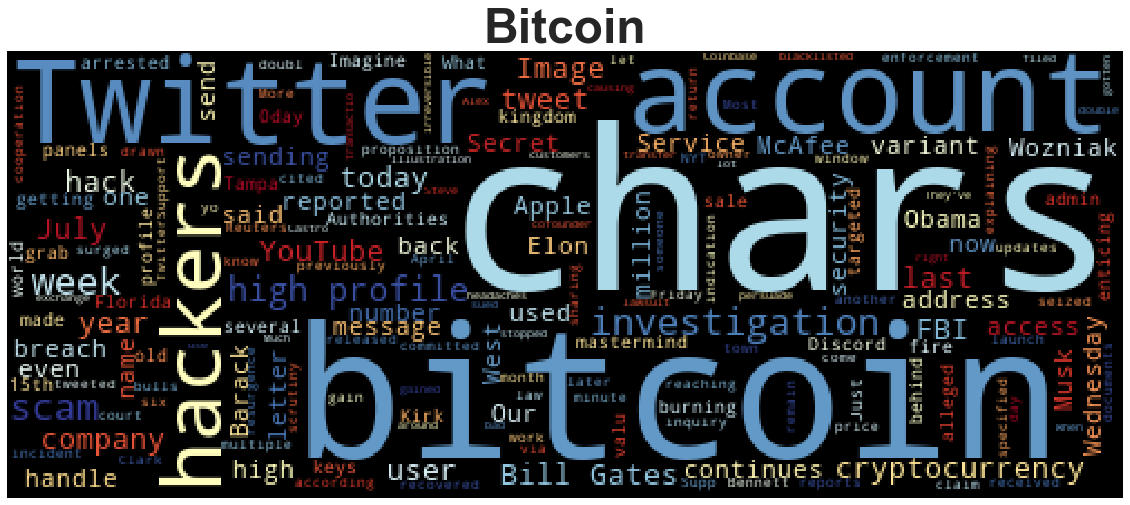

In [38]:
# Generate the Bitcoin word cloud
wordcloud(bitcoin.text.str.cat(), title='Bitcoin')

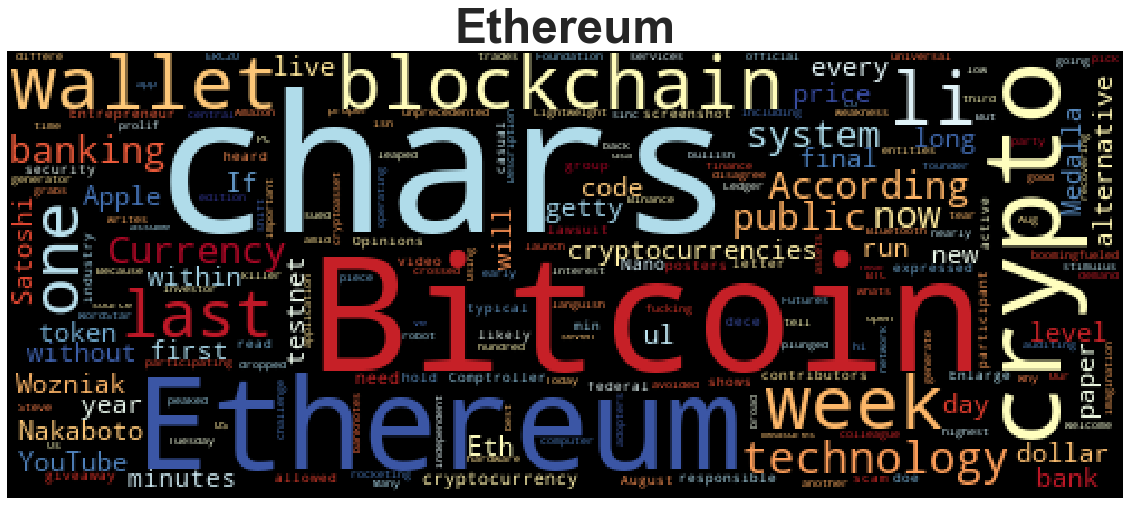

In [40]:
# Generate the Ethereum word cloud
wordcloud(ethereum.text.str.cat(), title='Ethereum')

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [42]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [44]:
# Concatenate all of the bitcoin text together
all_bitcoin_text = bitcoin.text.str.cat()
all_bitcoin_text

"Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the account admin panels in the world. What would you do? You could grab high-valu… [+8860 chars]Authorities in Tampa, Florida have arrested a 17-year-old for being the alleged “mastermind” behind the Twitter Bitcoin hack that targeted several high-profile accounts on July 15th, 2020. His name h… [+463 chars]On July 15, a Discord user with the handle Kirk#5270 made an enticing proposition. I work for Twitter, they said, according to court documents released Friday. I can claim any name, let me know if yo… [+3660 chars]In April, the Secret Service seized 100 Bitcoins from Clark, NYT reports. Weeks later, Bennett received a letter explaining that the Secret Service had recovered 100 of his Bitcoins. The letter cited… [+884 chars]Reuters had previously reported the FBI would launch an investigation into the hack.\r\nThe FBI inquiry is now one of multiple investigations i

In [45]:
# Run the NER processor on all of the text
doc = nlp(all_bitcoin_text)


# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [46]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [47]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Twitter ORG
Tampa GPE
Florida GPE
17-year-old DATE
Twitter Bitcoin ORG
July 15th, 2020 DATE
chars]On July 15 DATE
Discord GPE
Twitter ORG
Friday DATE
April DATE
the Secret Service ORG
100 CARDINAL
Bitcoins ORG
Clark GPE
Weeks later DATE
Bennett PERSON
the Secret Service ORG
100 CARDINAL
FBI ORG
FBI ORG
one CARDINAL
Bitcoin GPE
30-minute TIME
bitcoin GPE
today DATE
1,268.19 MONEY
six-month DATE
11,203.90 MONEY
one-day DATE
12.73% PERCENT
Alex Castro PERSON
Coinbase ORG
around 1,100 CARDINAL
Apple ORG
YouTube PRODUCT
Steve Wozniak PERSON
this week DATE
YouTube PRODUCT
Twitter ORG
YouTube PRODUCT
Wozniak PERSON
Kanye West GPE
Elon Musk ORG
Bill Gates PERSON
Barack Obama PERSON
FBI ORG
Twitt PERSON
Twitter PERSON
Wednesday DATE
millions CARDINAL
@rippl ORG
Twitters ORG
yesterday DATE
Bill Gates PERSON
Barack Obama PERSON
Appleto PERSON
Twitter ORG
earlier this week DATE
last week DATE
Twitter ORG
today DATE
week DATE
100 CARDINAL
Twitter ORG
today DATE
the year DATE
John McAfee
  PERSON
Th

---

## Ethereum NER

In [48]:
# Concatenate all of the bitcoin text together
all_ethereum_text = ethereum.text.str.cat()

all_ethereum_text

'According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.\r\nThis doe… [+1760 chars]August\r\n4, 2020\r\n5 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nIf you have been an active or casual participant in the blockchain industry, you have likely heard of dece… [+5924 chars]Enlarge/ A screenshot from Wozniak\'s lawsuit shows a typical "Bitcoin giveaway" scam video on YouTube.\r\n4 with 4 posters participating\r\nApple co-founder Steve Wozniak has sued YouTube over the prolif… [+3424 chars]Crypto has been on a tear in the last week.\r\nBitcoin is up 18% in the last seven days:\r\nEthereum is up over 30% in the last week:\r\nBut this isn’t the first time we’ve had a bullish run in crypto sinc… [+1941 chars]<ul><li>Bitcoin crossed the $11,000 level and trades near its highest level in nearly a year on Tuesday amid US dollar wea

In [52]:
# Run the NER processor on all of the text
all_ethereum_text = ethereum.text.str.cat()
all_ethereum_text

ethereum_doc = nlp(all_ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [54]:
# Render the visualization
displacy.render(ethereum_doc, style='ent', jupyter=True)

In [55]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

U.S. GPE
4 DATE
2020 DATE
5 CARDINAL
Wozniak PERSON
Bitcoin GPE
YouTube PRODUCT
4 CARDINAL
4 CARDINAL
Apple ORG
Steve Wozniak PERSON
YouTube ORG
the last week DATE
Bitcoin GPE
18% PERCENT
the last seven days DATE
over 30% PERCENT
the last week DATE
first ORDINAL
Bitcoin GPE
11,000 MONEY
nearly a year DATE
Tuesday DATE
US GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
bitcoin GPE
third ORDINAL
one CARDINAL
WordStar FAC
Apple ORG
Medalla PERSON
the Ethereum Foundation ORG
ul><li PERSON
Medalla GPE
Aug. 2 DATE
418 MONEY
5 minutes TIME
25% PERCENT
Binance Futures ORG
ETH ORG
as low as $302 MONEY
385 MONEY
10 minutes TIME
Bitcoin GPE
Ethereum GPE
ERC20 ORG
The Ledger Nano X Bluetooth WORK_OF_ART
89.25 MONEY
Amazon ORG
one hundred dollar MONEY
Fintech ORG
chars]Five years ago this week DATE
first ORDINAL
Bitcoins ORG
Mandelker PERSON
U.S. Treasury ORG
2018 DATE
the Department of Justice ORG
Bitcoin GPE
